In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

import matplotlib.dates as mdates
from scipy.signal import medfilt

# %matplotlib

In [2]:
ms = [10.257, 10.3, 10.29]
bs = [-12.2, -10.2, -8.4]

LABELS = ["Baño interno", "Baño externo", "Ambiente"]

In [3]:
def loadData(file_name, time_adjust = 0):
    string = np.genfromtxt(file_name, delimiter = "\t", skip_header = 1, dtype = str)
    times = string[:, 0]
    
    times = [datetime.strptime(text, "%Y-%m-%d %H:%M:%S") - timedelta(hours = time_adjust) for text in times]
             
    data = string[:, 1:].astype(float) * 1000
    data = dataToTemperature(data)
    return times, data

def dataToTemperature(data):
    for i in range(3):
        data[:, i] = (data[:, i] - bs[i]) / ms[i]
    return data

def plotTemperatureInTime(time, data):
    fig, ax = plt.subplots(figsize = (8, 4.5))
    for i in range(3):
        ax.plot(time, data[:, i], label = LABELS[i])

    date_format = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(date_format)
    ax.xaxis.set_minor_formatter(date_format)

    ax.legend()
    ax.set_xlabel("Hora")
    ax.set_ylabel("Temperatura ($^\circ$C)")

    fig.autofmt_xdate()
    fig.tight_layout()

    return fig, ax

In [4]:
time, data = loadData("Temperature.txt", time_adjust = 5)
data = medfilt(data, kernel_size = [15, 1])

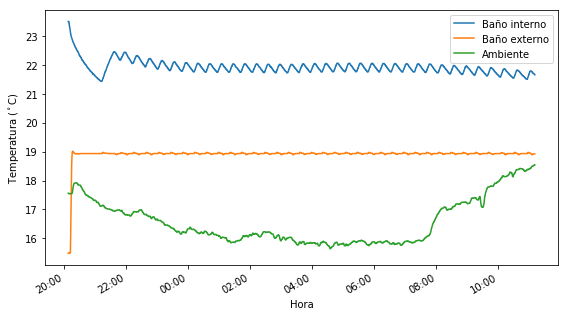

In [5]:
fig, ax = plotTemperatureInTime(time, data)
plt.show()

In [6]:
dt = np.diff(time).mean().total_seconds()

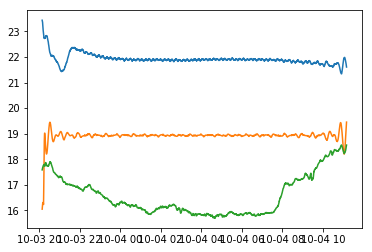

In [7]:
fft = np.fft.rfft(data, axis = 0)
freq = np.fft.rfftfreq(len(data), d = dt)

cond = (freq < 10e-4) & (freq > 6e-4) 

fft[cond] = 0
temp = np.fft.irfft(fft, axis = 0)

plt.plot(time, temp)
plt.show()